<a href="https://colab.research.google.com/github/gdutr/gdutr.github.io/blob/main/Etude_maladie_renale.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Première exploration du dataset

In [1]:
# Importation modules
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
#warnings.filterwarnings('ignore')

In [2]:
# Importation du dataset
nan = ["NaN", "NAN","\t43", "\t", "\t?"]
df_rein = pd.read_csv("https://raw.githubusercontent.com/MaskiVal/DataSets/main/kidney_disease.csv", na_values=nan)
pd.set_option("display.max_row", 111)

In [3]:
# 5 premiere lignes
display(df_rein.head())

# Information
display(df_rein.dtypes)

# Description
display(df_rein.describe())

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0.0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,1.0,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,2.0,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,3.0,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,4.0,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


id                float64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv               float64
wc                float64
rc                float64
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc
count,399.000000,385.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000,314.000000,294.000000,269.000000
mean,199.892231,51.615584,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437,38.687898,8406.122449,4.707435
std,115.492678,17.270301,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587,9.156679,2944.474190,1.025323
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,9.000000,2200.000000,2.100000
25%,100.500000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000,32.000000,6500.000000,3.900000
50%,200.000000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000,40.000000,8000.000000,4.800000
75%,299.500000,65.000000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000,46.000000,9800.000000,5.400000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,54.000000,26400.000000,8.000000


# Data Cleaning

In [4]:
# Information des colonnes de type object
for col in df_rein.select_dtypes(object):
  print(f"{col} : {[i for i in df_rein[col].unique()]}\n")

rbc : [nan, 'normal', 'abnormal']

pc : ['normal', 'abnormal', nan]

pcc : ['notpresent', 'present', nan]

ba : ['notpresent', 'present', nan]

htn : ['yes', 'no', nan]

dm : ['yes', 'no', ' yes', '\tno', '\tyes', nan]

cad : ['no', 'yes', '\tno', nan]

appet : ['good', 'poor', nan]

pe : ['no', 'yes', nan]

ane : ['no', 'yes', nan]

classification : ['ckd', 'ckd\t', 'notckd']



Nous observons, qu'il y a des données avec des erreurs de frappe.

In [5]:
# Nettoyage et encodage
df_rein['dm'].replace({'\tno':'no', '\tyes':'yes', ' yes':'yes'},inplace=True)
df_rein['cad'].replace({'\tno':'no'}, inplace = True)
df_rein['classification'].replace({'ckd' : 'yes', 'ckd\t' : 'yes', 'notckd' : 'no' }, inplace = True)

# Changement nom de colonne
df_rein.rename(columns={'classification':'ill'}, inplace = True)

In [6]:
df_rein.isna().mean()*100

id        0.25
age       3.75
bp        3.00
sg       11.75
al       11.50
su       12.25
rbc      38.00
pc       16.25
pcc       1.00
ba        1.00
bgr      11.00
bu        4.75
sc        4.25
sod      21.75
pot      22.00
hemo     13.00
pcv      21.50
wc       26.50
rc       32.75
htn       0.50
dm        0.50
cad       0.50
appet     0.25
pe        0.25
ane       0.25
ill       0.00
dtype: float64

<Axes: >

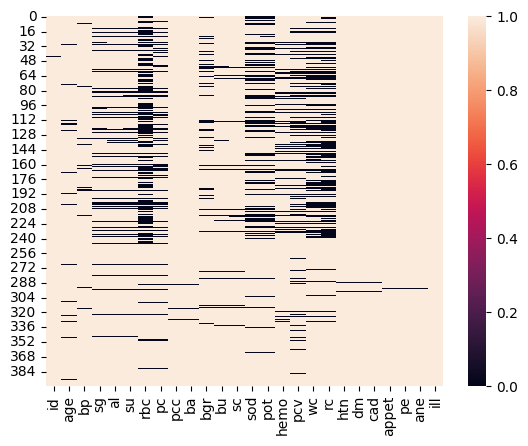

In [7]:
# Utilisation d'une heatmap pour visualiser les valeurs manquantes
sns.heatmap(df_rein.notna())

<Axes: >

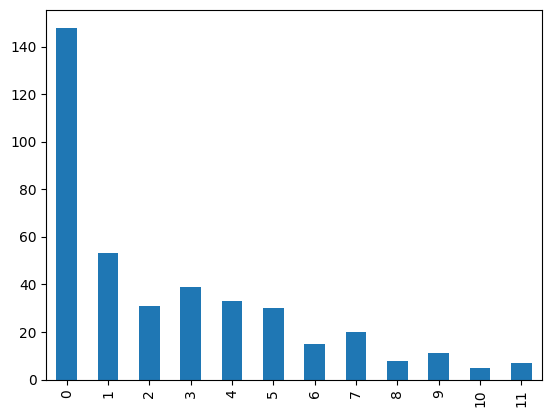

In [8]:
df_rein.isna().sum(axis=1).value_counts().sort_index().plot.bar()

J'enleve toutes les lignes avec un minimum de 6 valeurs manquantes sur la même ligne.

In [9]:
df_rein = df_rein[df_rein.isna().sum(axis=1)<=5]

In [10]:
# Je remplace toutes les valeurs de types category par la valeur la plus présente
for col in df_rein.select_dtypes(object).columns:
  df_rein[col] = df_rein[col].fillna(df_rein[col].mode()[0])

<ipython-input-10-9d9901c2767a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rein[col] = df_rein[col].fillna(df_rein[col].mode()[0])
<ipython-input-10-9d9901c2767a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rein[col] = df_rein[col].fillna(df_rein[col].mode()[0])
<ipython-input-10-9d9901c2767a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

In [11]:
# Remplacement des valeurs manquantes numériques par la moyenne
col_num = df_rein.select_dtypes([int,float]).columns.to_list()
df_rein[col_num] = df_rein[col_num].fillna(df_rein[col_num].mean())

In [12]:
# colonne category
col_cat = df_rein.select_dtypes(object).columns.to_list()

# Data visualisation

14
















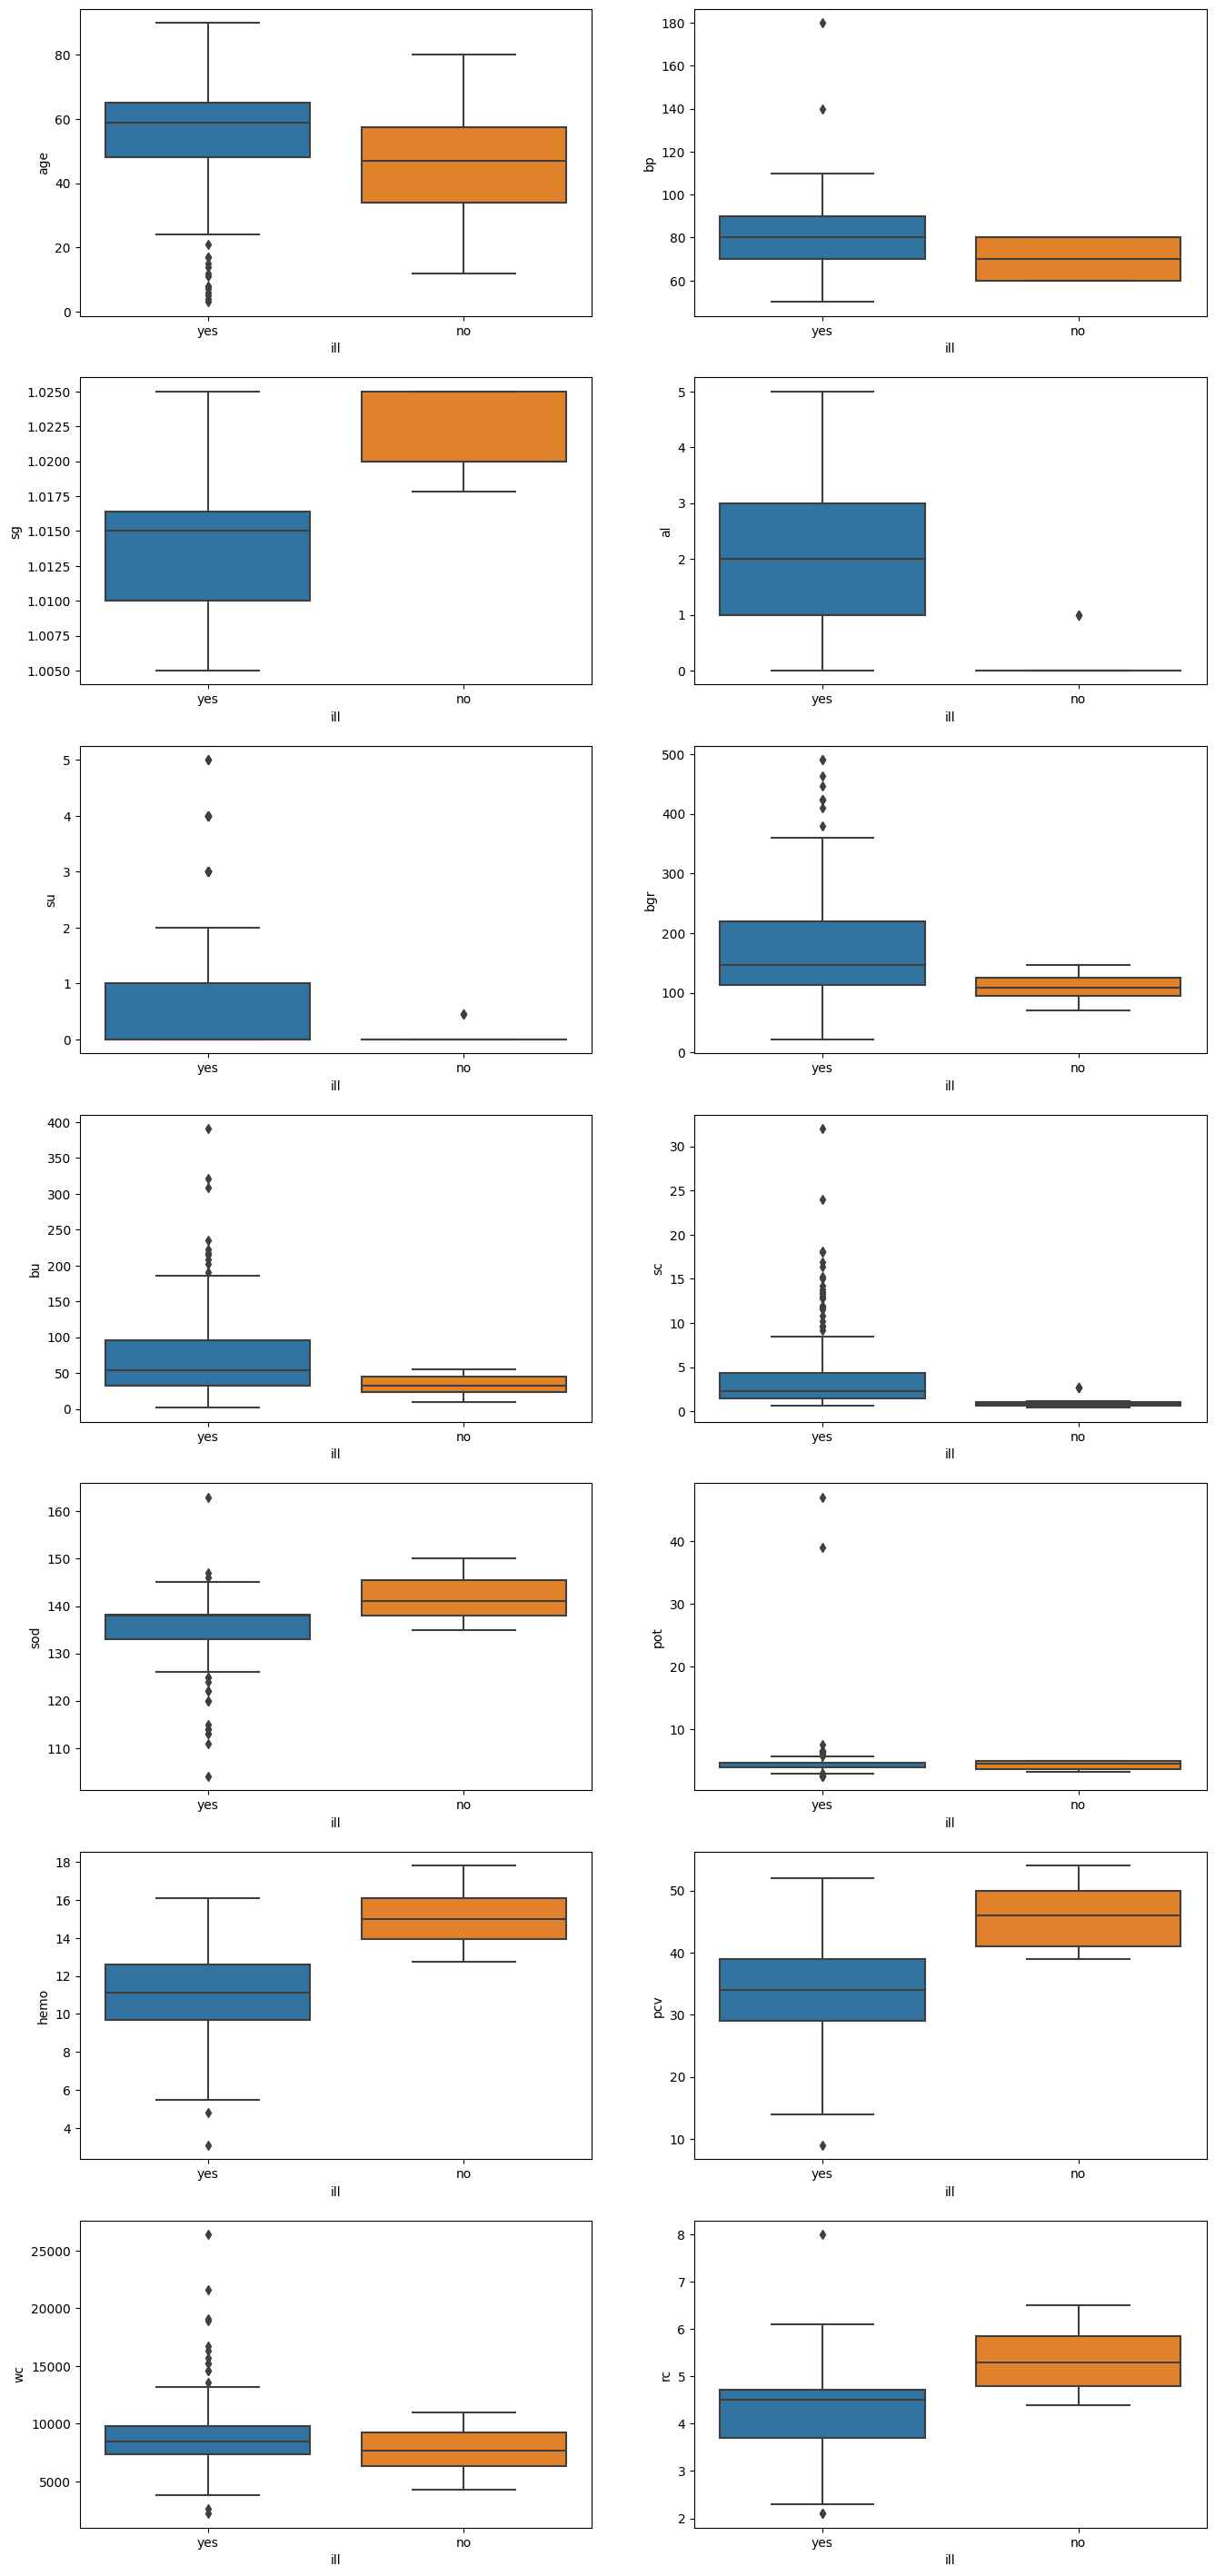

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

In [13]:
nbre_ligne = 7
nbre_cols = 2

fig, axes = plt.subplots(nbre_ligne, nbre_cols, figsize=(16, 36))
list_cols = df_rein.drop(columns = 'id').select_dtypes([int,float]).columns

print(len(list_cols))

id = 0
for row in range(nbre_ligne):
  for col in range(nbre_cols):
    if id < len(list_cols):
      plt.figure(figsize = (12,8))
      sns.boxplot(y = df_rein[list_cols[id]], x = df_rein['ill'], ax=axes[row,col])#.set(title=list_cols[id])
      id += 1
  print("\n")

# for col in df_rein.drop(columns = 'id').select_dtypes([int,float]).columns:
#   plt.figure()
#   sns.boxplot(x = df_rein[col])
#   #plt.title(col)
#   plt.show()
#   print("\n")

Les boxplots nous indique que nous avons la plupart des outliers qui sont du côté, des patients atteint d'une maladie.

14


<ipython-input-14-4834a459f995>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = df_rein[list_cols[id]][df_rein['ill']=='yes'], ax=axes[row,col], label = 'positif', color='r')
<ipython-input-14-4834a459f995>:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = df_rein[list_cols[id]][df_rei

<ipython-input-14-4834a459f995>:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = df_rein[list_cols[id]][df_rein['ill']=='no'], ax=axes[row,col], label = 'negatif').set(title=list_cols[id])
<ipython-input-14-4834a459f995>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = df_rein[list_col

<ipython-input-14-4834a459f995>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = df_rein[list_cols[id]][df_rein['ill']=='yes'], ax=axes[row,col], label = 'positif', color='r')
<ipython-input-14-4834a459f995>:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = df_rein[list_cols[id]][df_rei

<ipython-input-14-4834a459f995>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = df_rein[list_cols[id]][df_rein['ill']=='yes'], ax=axes[row,col], label = 'positif', color='r')
<ipython-input-14-4834a459f995>:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = df_rein[list_cols[id]][df_rei

<ipython-input-14-4834a459f995>:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = df_rein[list_cols[id]][df_rein['ill']=='no'], ax=axes[row,col], label = 'negatif').set(title=list_cols[id])
<ipython-input-14-4834a459f995>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = df_rein[list_col

<ipython-input-14-4834a459f995>:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = df_rein[list_cols[id]][df_rein['ill']=='no'], ax=axes[row,col], label = 'negatif').set(title=list_cols[id])
<ipython-input-14-4834a459f995>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = df_rein[list_col

<ipython-input-14-4834a459f995>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = df_rein[list_cols[id]][df_rein['ill']=='yes'], ax=axes[row,col], label = 'positif', color='r')
<ipython-input-14-4834a459f995>:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = df_rein[list_cols[id]][df_rei

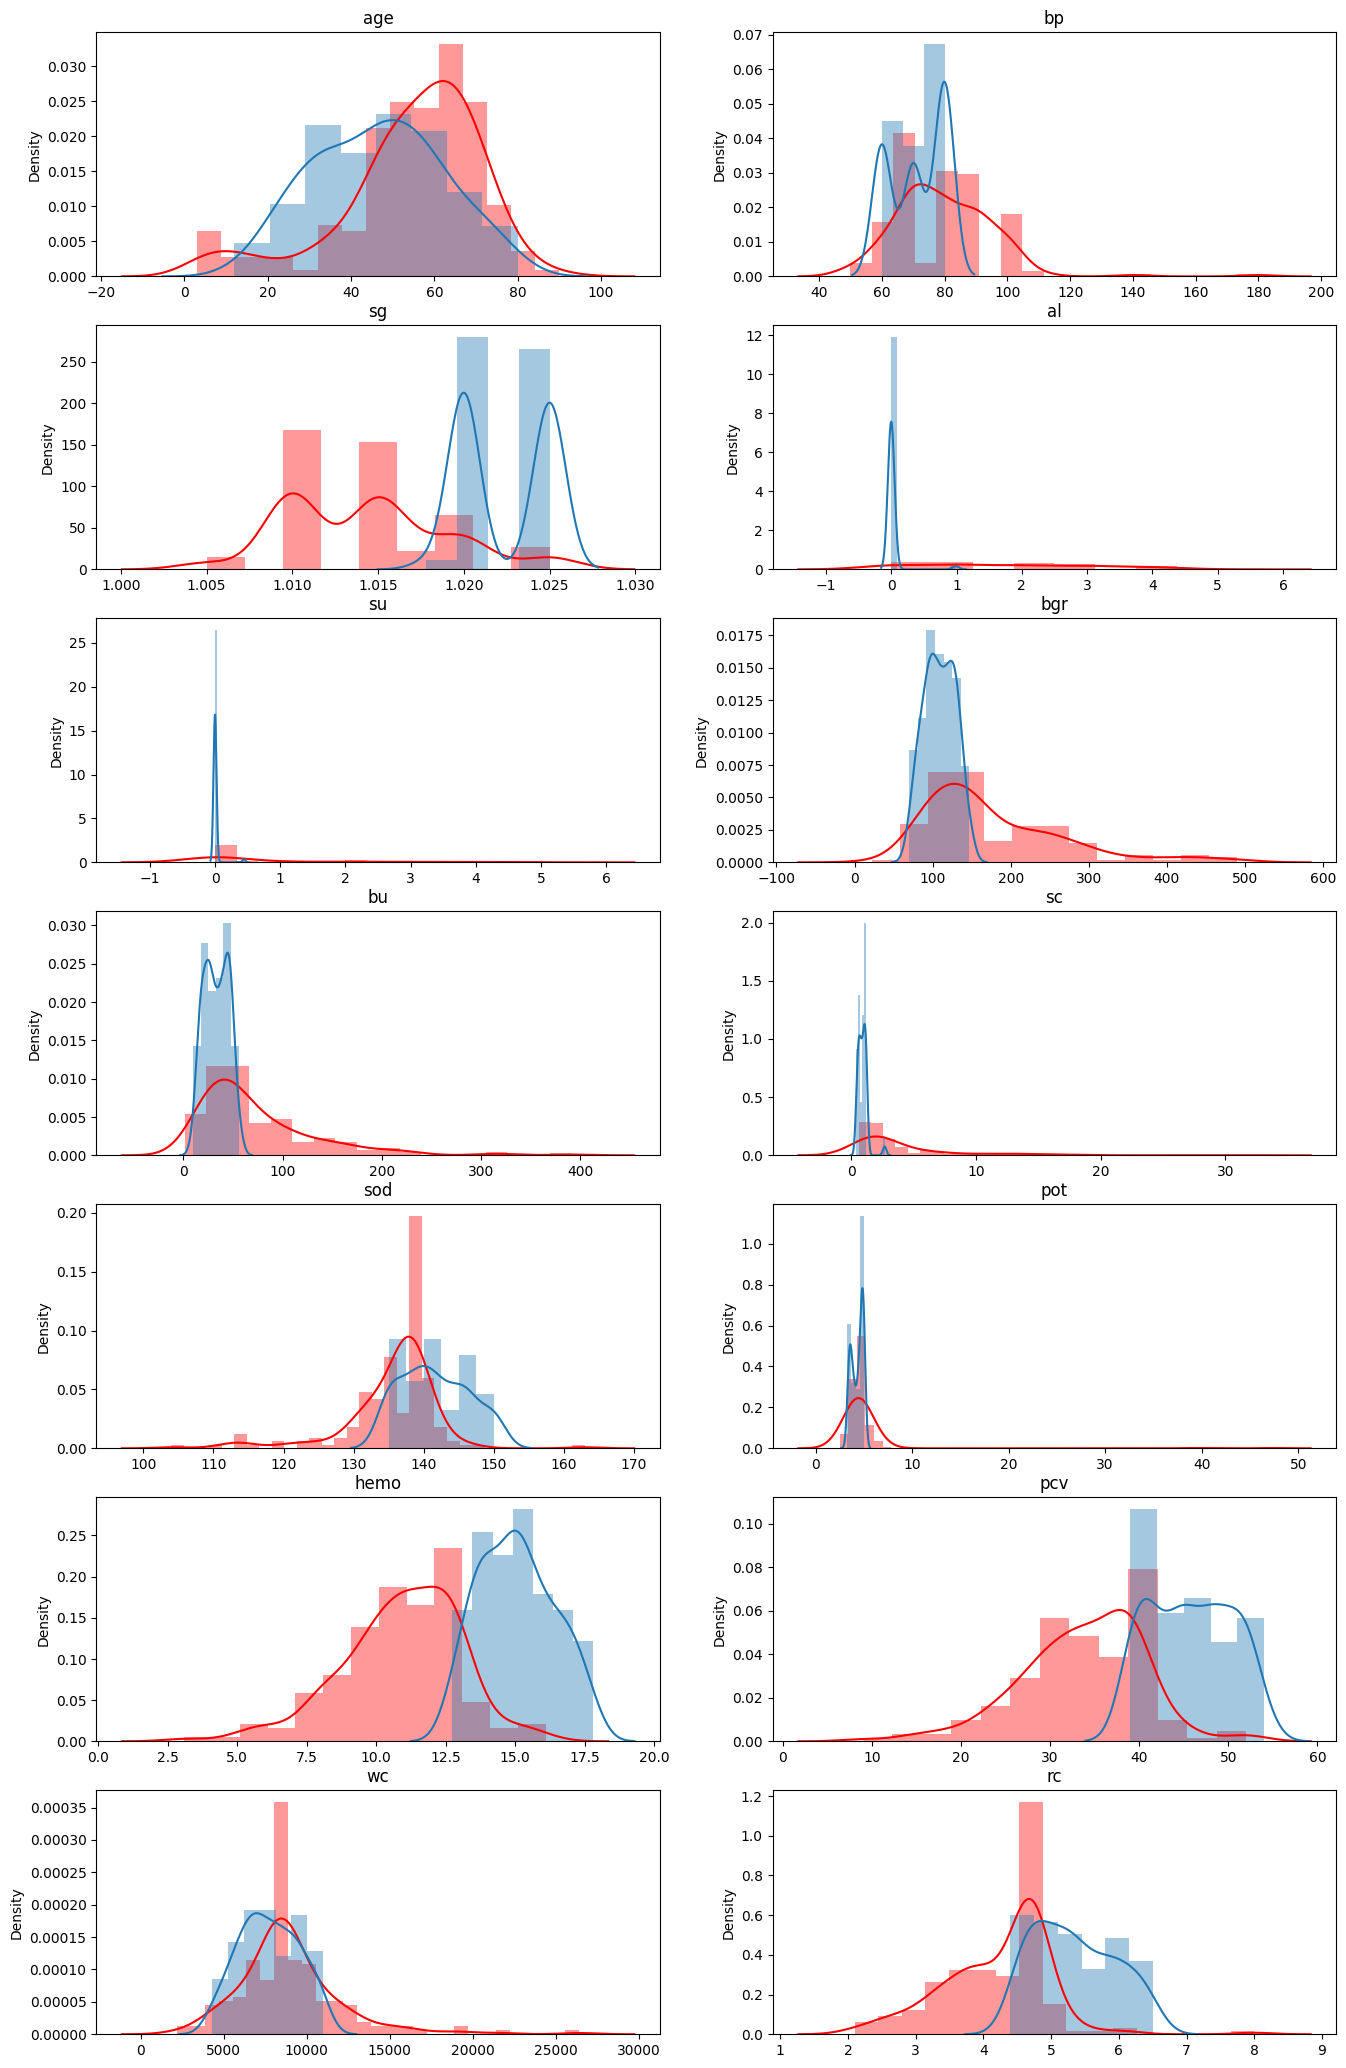

In [14]:
nbre_ligne = 7
nbre_cols = 2

fig, axes = plt.subplots(nbre_ligne, nbre_cols, figsize=(16, 26))
list_cols = df_rein.drop(columns = 'id').select_dtypes([int,float]).columns

print(len(list_cols))

id = 0
for row in range(nbre_ligne):
  for col in range(nbre_cols):
    if id < len(list_cols):
      #plt.figure(figsize = (12,8))
      sns.distplot(x = df_rein[list_cols[id]][df_rein['ill']=='yes'], ax=axes[row,col], label = 'positif', color='r')
      sns.distplot(x = df_rein[list_cols[id]][df_rein['ill']=='no'], ax=axes[row,col], label = 'negatif').set(title=list_cols[id])
      id += 1
  print("\n")

Les distplots nous apportent une certaine tendance à propos des individues atteint de la maladie :
- variable basse par rapport à la normale : albumine, taux de sucre, créatine sérique
- variable haute par apport à la normale : densité urinaire, l'hémoglobine, le volume d'hématocytes et le nombre de globules rouges.


In [15]:
liste = df_rein.select_dtypes(exclude=object).columns.to_list()
liste.append('ill')


In [16]:
#len(col_pairplot)

In [17]:
# col_pairplot = df_rein.select_dtypes([int,float]).columns.to_list()
# col_pairplot.append('ill')
# sns.pairplot(data = df_rein[col_pairplot], hue='ill')

<Axes: >

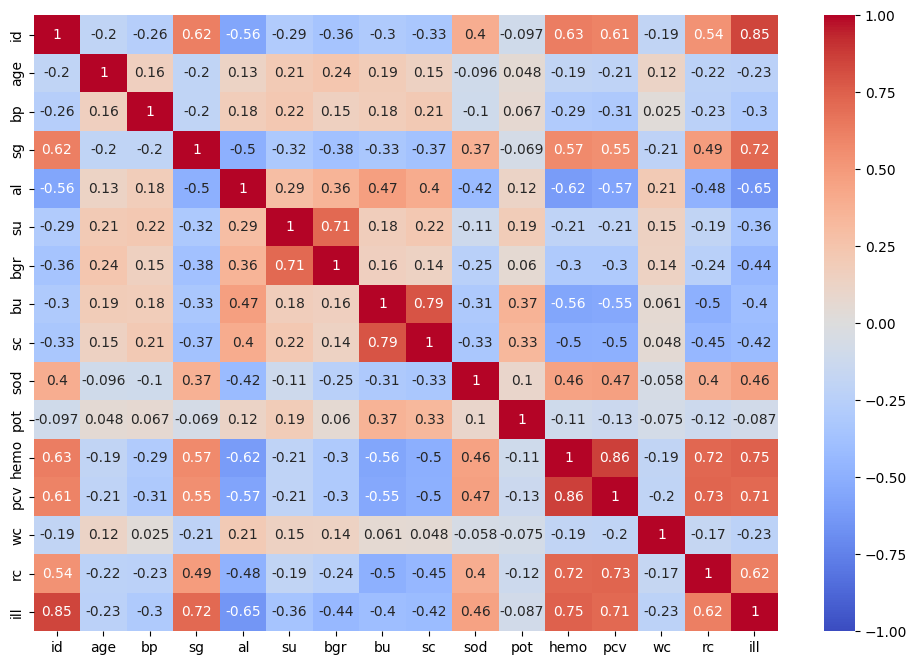

In [32]:
plt.figure(figsize=(12,8))
df_rein['ill'] = df_rein['ill'].factorize()[0]
sns.heatmap(df_rein.corr(), cmap = 'coolwarm', annot = True, vmin = -1)

Dans cette heatmap, nous avons quelques corrélation interessantes : le rc avec lepcv et l'hemo

In [19]:
# Test ANOVA
import statsmodels.api as sm
import statsmodels.formula.api as smf

results = []

for col in col_num:
    result = smf.ols(f'{col} ~ ill', data=df_rein).fit()
    table = sm.stats.anova_lm(result)
    F = table.iloc[0, 3]  # The F-statistic
    p_value = table.iloc[0, 4]  # The p-value
    results.append((col, F, p_value))

df_anova = pd.DataFrame(results, columns=['col', 'F', 'p_value'])
df_anova


,col,F,p_value
0,id,868.319616,1.138919e-94
1,age,19.170284,1.604336e-05
2,bp,33.483421,1.663001e-08
3,sg,353.280642,3.455108e-54
4,al,238.388351,6.505620e-41
5,su,48.265256,1.973701e-11
6,bgr,81.951721,1.210305e-17
7,bu,62.844002,3.433902e-14
8,sc,69.211340,2.320511e-15
9,sod,89.150904,6.694875e-19



À l'exception du taux de potassium, toutes les variables numériques semblent avoir une influence sur la probabilité qu'un patient soit atteint d'une maladie rénale chronique

In [20]:
#Test chi2 pour détecter quelles variables influent sur la probabilité que le patient soit atteint de la maladie
from scipy.stats import chi2_contingency

results = []

for col in col_cat:
    table = pd.crosstab(df_rein[col], df_rein['ill'])
    test = chi2_contingency(table)
    statistique = test[0]
    p_value = test[1]
    degre_liberte = test[2]
    results.append((col, statistique, p_value, degre_liberte))

df_chi2 = pd.DataFrame(results, columns=['col', 'statistique', 'p_value', 'degre_liberte'])
df_chi2

,col,statistique,p_value,degre_liberte
0,rbc,35.749556,2.243831e-09,1
1,pc,66.131054,4.219159e-16,1
2,pcc,32.718042,1.065437e-08,1
3,ba,13.999509,1.828583e-04,1
4,htn,138.826772,4.805947e-32,1
5,dm,114.502239,1.011520e-26,1
6,cad,22.114765,2.568267e-06,1
7,appet,63.669526,1.471433e-15,1
8,pe,53.034576,3.277284e-13,1
9,ane,38.844293,4.589938e-10,1


Avec toutes les p_value < 0.05 toute les variables ne sont independantes.

In [21]:
df_rein.dtypes

id       float64
age      float64
bp       float64
sg       float64
al       float64
su       float64
rbc       object
pc        object
pcc       object
ba        object
bgr      float64
bu       float64
sc       float64
sod      float64
pot      float64
hemo     float64
pcv      float64
wc       float64
rc       float64
htn       object
dm        object
cad       object
appet     object
pe        object
ane       object
ill       object
dtype: object

#Machine learning

In [30]:
df_rein

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,ill
0,0.00,48.00,80.00,1.02,1.00,0.00,normal,normal,notpresent,notpresent,...,44.00,7800.00,5.20,yes,yes,no,good,no,no,yes
1,1.00,7.00,50.00,1.02,4.00,0.00,normal,normal,notpresent,notpresent,...,38.00,6000.00,4.71,no,no,no,good,no,no,yes
2,2.00,62.00,80.00,1.01,2.00,3.00,normal,normal,notpresent,notpresent,...,31.00,7500.00,4.71,no,yes,no,poor,no,yes,yes
3,3.00,48.00,70.00,1.00,4.00,0.00,normal,abnormal,present,notpresent,...,32.00,6700.00,3.90,yes,no,no,poor,yes,yes,yes
4,4.00,51.00,80.00,1.01,2.00,0.00,normal,normal,notpresent,notpresent,...,35.00,7300.00,4.60,no,no,no,good,no,no,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395.00,55.00,80.00,1.02,0.00,0.00,normal,normal,notpresent,notpresent,...,47.00,6700.00,4.90,no,no,no,good,no,no,no
396,396.00,42.00,70.00,1.02,0.00,0.00,normal,normal,notpresent,notpresent,...,54.00,7800.00,6.20,no,no,no,good,no,no,no
397,397.00,12.00,80.00,1.02,0.00,0.00,normal,normal,notpresent,notpresent,...,49.00,6600.00,5.40,no,no,no,good,no,no,no
398,398.00,17.00,60.00,1.02,0.00,0.00,normal,normal,notpresent,notpresent,...,51.00,7200.00,5.90,no,no,no,good,no,no,no


In [33]:
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split

X = df_rein.drop(columns=['ill','id','hemo']).select_dtypes(exclude = object)
y= df_rein['ill']

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.25,random_state =123)
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
models

100%|██████████| 29/29 [00:02<00:00, 10.25it/s]

[LightGBM] [Info] Number of positive: 110, number of negative: 140
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000146 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 411
[LightGBM] [Info] Number of data points in the train set: 250, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.440000 -> initscore=-0.241162
[LightGBM] [Info] Start training from score -0.241162
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LogisticRegression,0.99,0.99,0.99,0.99,0.07
BernoulliNB,0.99,0.99,0.99,0.99,0.05
SVC,0.99,0.99,0.99,0.99,0.07
SGDClassifier,0.99,0.99,0.99,0.99,0.08
Perceptron,0.99,0.99,0.99,0.99,0.03
ExtraTreesClassifier,0.99,0.99,0.99,0.99,0.38
NuSVC,0.99,0.99,0.99,0.99,0.04
LinearSVC,0.98,0.98,0.98,0.98,0.05
CalibratedClassifierCV,0.98,0.98,0.98,0.98,0.17
